In [1]:
import numpy as np
x=6*np.random.rand(100,1)-3
y=4+3*x+np.random.randn(100,1)

#%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y,'b.')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

intercept = [3.94119759], slopt = [[3.05947331]], r_sq = 0.9688543302927052


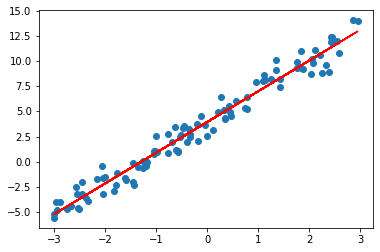

In [2]:
#DJ's choice
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x,y)
y_pred=reg.predict(x)

print('intercept = {}, slopt = {}, r_sq = {}'.format(reg.intercept_, reg.coef_, reg.score(x,y)))

plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

intercept = [3.94119759], slopt = [[3.05947331]]
r_square = 96.9%


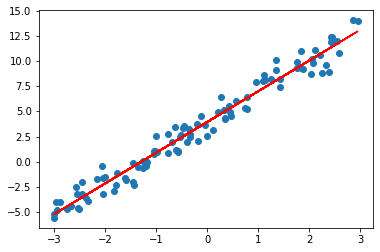

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

print('intercept = {}, slopt = {}'.format(lin_reg.intercept_, lin_reg.coef_))

y_pred=lin_reg.predict(x)

from sklearn.metrics import r2_score
print('r_square = {:.1%}'.format(r2_score(y, y_pred)))

plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

intercept = [3.98380618], slopt = [2.90635325]
r_square = 96.2%


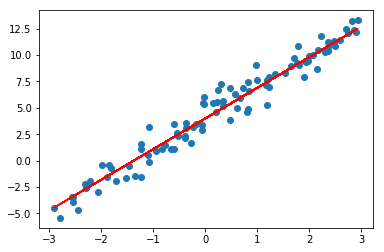

In [36]:
from sklearn.linear_model import SGDRegressor
import numpy as np
sgd_reg=SGDRegressor(max_iter=50, tol=-np.infty, penalty=None,
                    eta0=0.1, random_state=42)
sgd_reg.fit(x,y.ravel())
print('intercept = {}, slopt = {}'.format(sgd_reg.intercept_, sgd_reg.coef_))

y_pred=sgd_reg.predict(x)
print('r_square = {:.1%}'.format(r2_score(y, y_pred)))

plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

In [21]:
print(y.ravel().shape)
print(y.shape)
print(x.shape)

(100,)
(100, 1)
(100, 1)


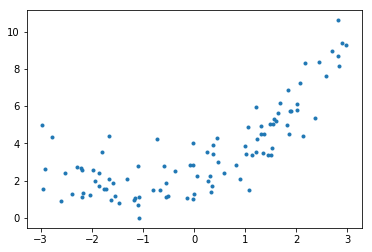

In [4]:
#polynomial regression
y2 = 0.5 * x**2 + x + 2 + np.random.randn(100,1)
plt.plot(x,y2,'.')
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x2 = poly_features.fit_transform(x)

lin_reg.fit(x2, y2)
lin_reg.intercept_, lin_reg.coef_

(array([3.10251525]), array([[-0.11367954,  0.18196266]]))

r_square = 4.1%


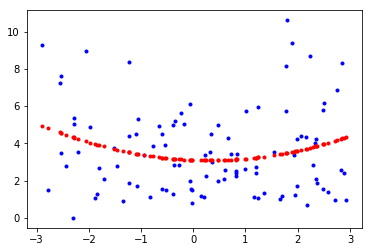

In [34]:
y2_pred=lin_reg.predict(x2)
print('r_square = {:.1%}'.format(r2_score(y2, y2_pred)))
#plt.plot(x2[:,0],'b.')
#plt.plot(x2[:,1],'k.')
#plt.scatter(x2[:,0],x2[:,1])
plt.plot(x,y2,'b.')
plt.plot(x,y2_pred,'r.')
plt.show()

r_square = 4.1%


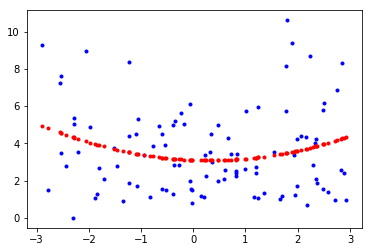

In [35]:
#same as above
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pol_reg = Pipeline((
        ('pol_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('lin_reg', LinearRegression()),
        ))

pol_reg.fit(x,y2)
y2_pred=pol_reg.predict(x)
print('r_square = {:.1%}'.format(r2_score(y2, y2_pred)))
plt.plot(x,y2,'b.')
plt.plot(x,y2_pred,'r.')
plt.show()

In [63]:
#Logistic Regression
from sklearn import datasets
iris = datasets.load_iris()
#print(iris.keys())
#print(iris.DESCR)

#binary
x=iris['data']
y=(iris['target']==2).astype(np.int) #1 if Virginica, 0 else

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)